In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

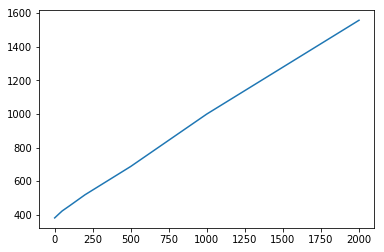

In [3]:
x = [1, 20, 50, 100, 200, 500, 1000, 2000]
time = [381.46, 397.63, 422.70, 454.22, 518.88, 687.08, 998.88, 1556.51]
plt.plot(x, time)